In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_feature=pd.read_csv('/home/raulherrero/datos-zrive/feature_frame.csv')

In [5]:
df_feature.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [7]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [20]:
info_cols= ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col='outcome'
features_cols=[col for col in df_feature.columns if col not in info_cols + [label_col]]

categoriacal_cols=['product_type', 'vendor']
binary_cols=['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols= [col for col in features_cols if col not in categoriacal_cols + binary_cols]

In [7]:
df_feature[label_col].value_counts()

outcome
0.0        2847317
1.0          33232
Name: count, dtype: int64

In [21]:
for col in binary_cols:
    print(f"Value counts {col}: {df_feature[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {df_feature.groupby(col)['outcome'].mean().to_dict()}")
    print("---")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
---
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
---
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
---
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
---


<Axes: >

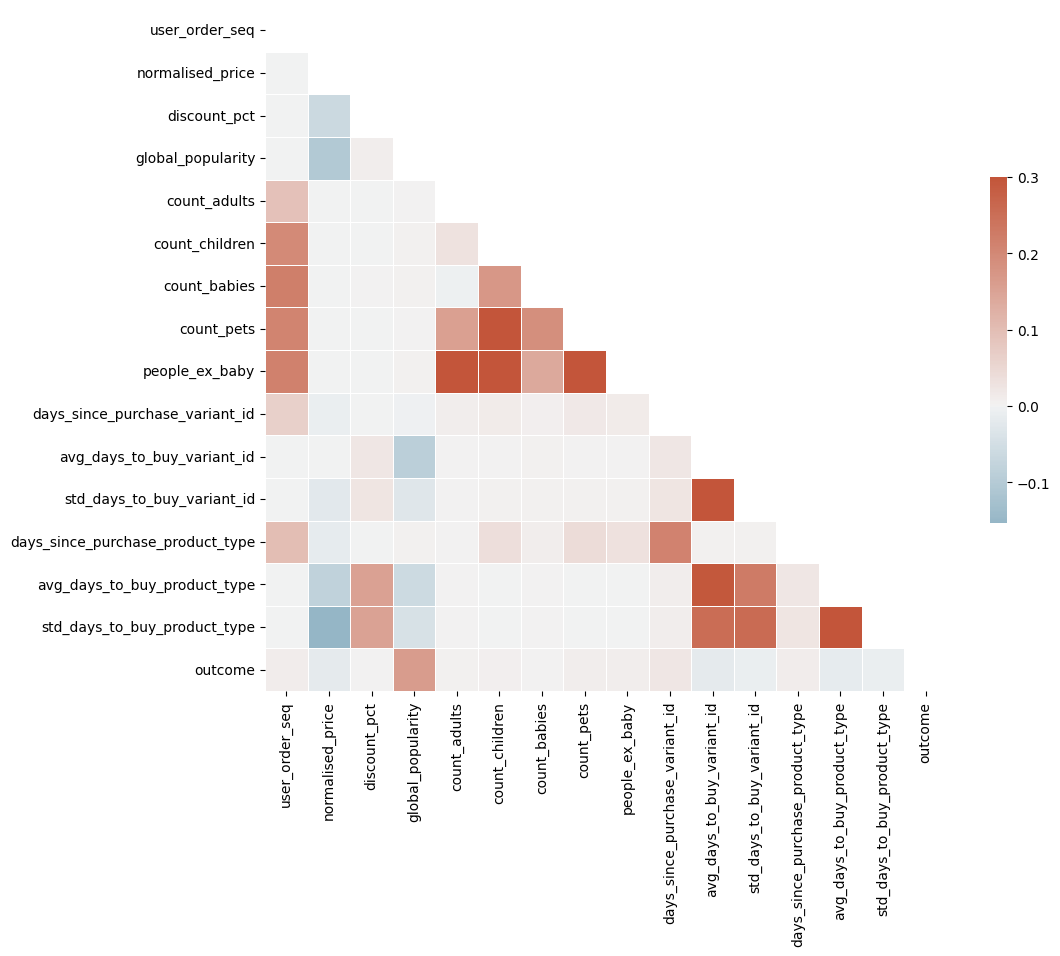

In [22]:
corr=df_feature[numerical_cols + [label_col]].corr()

mask=np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))

cmap= sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

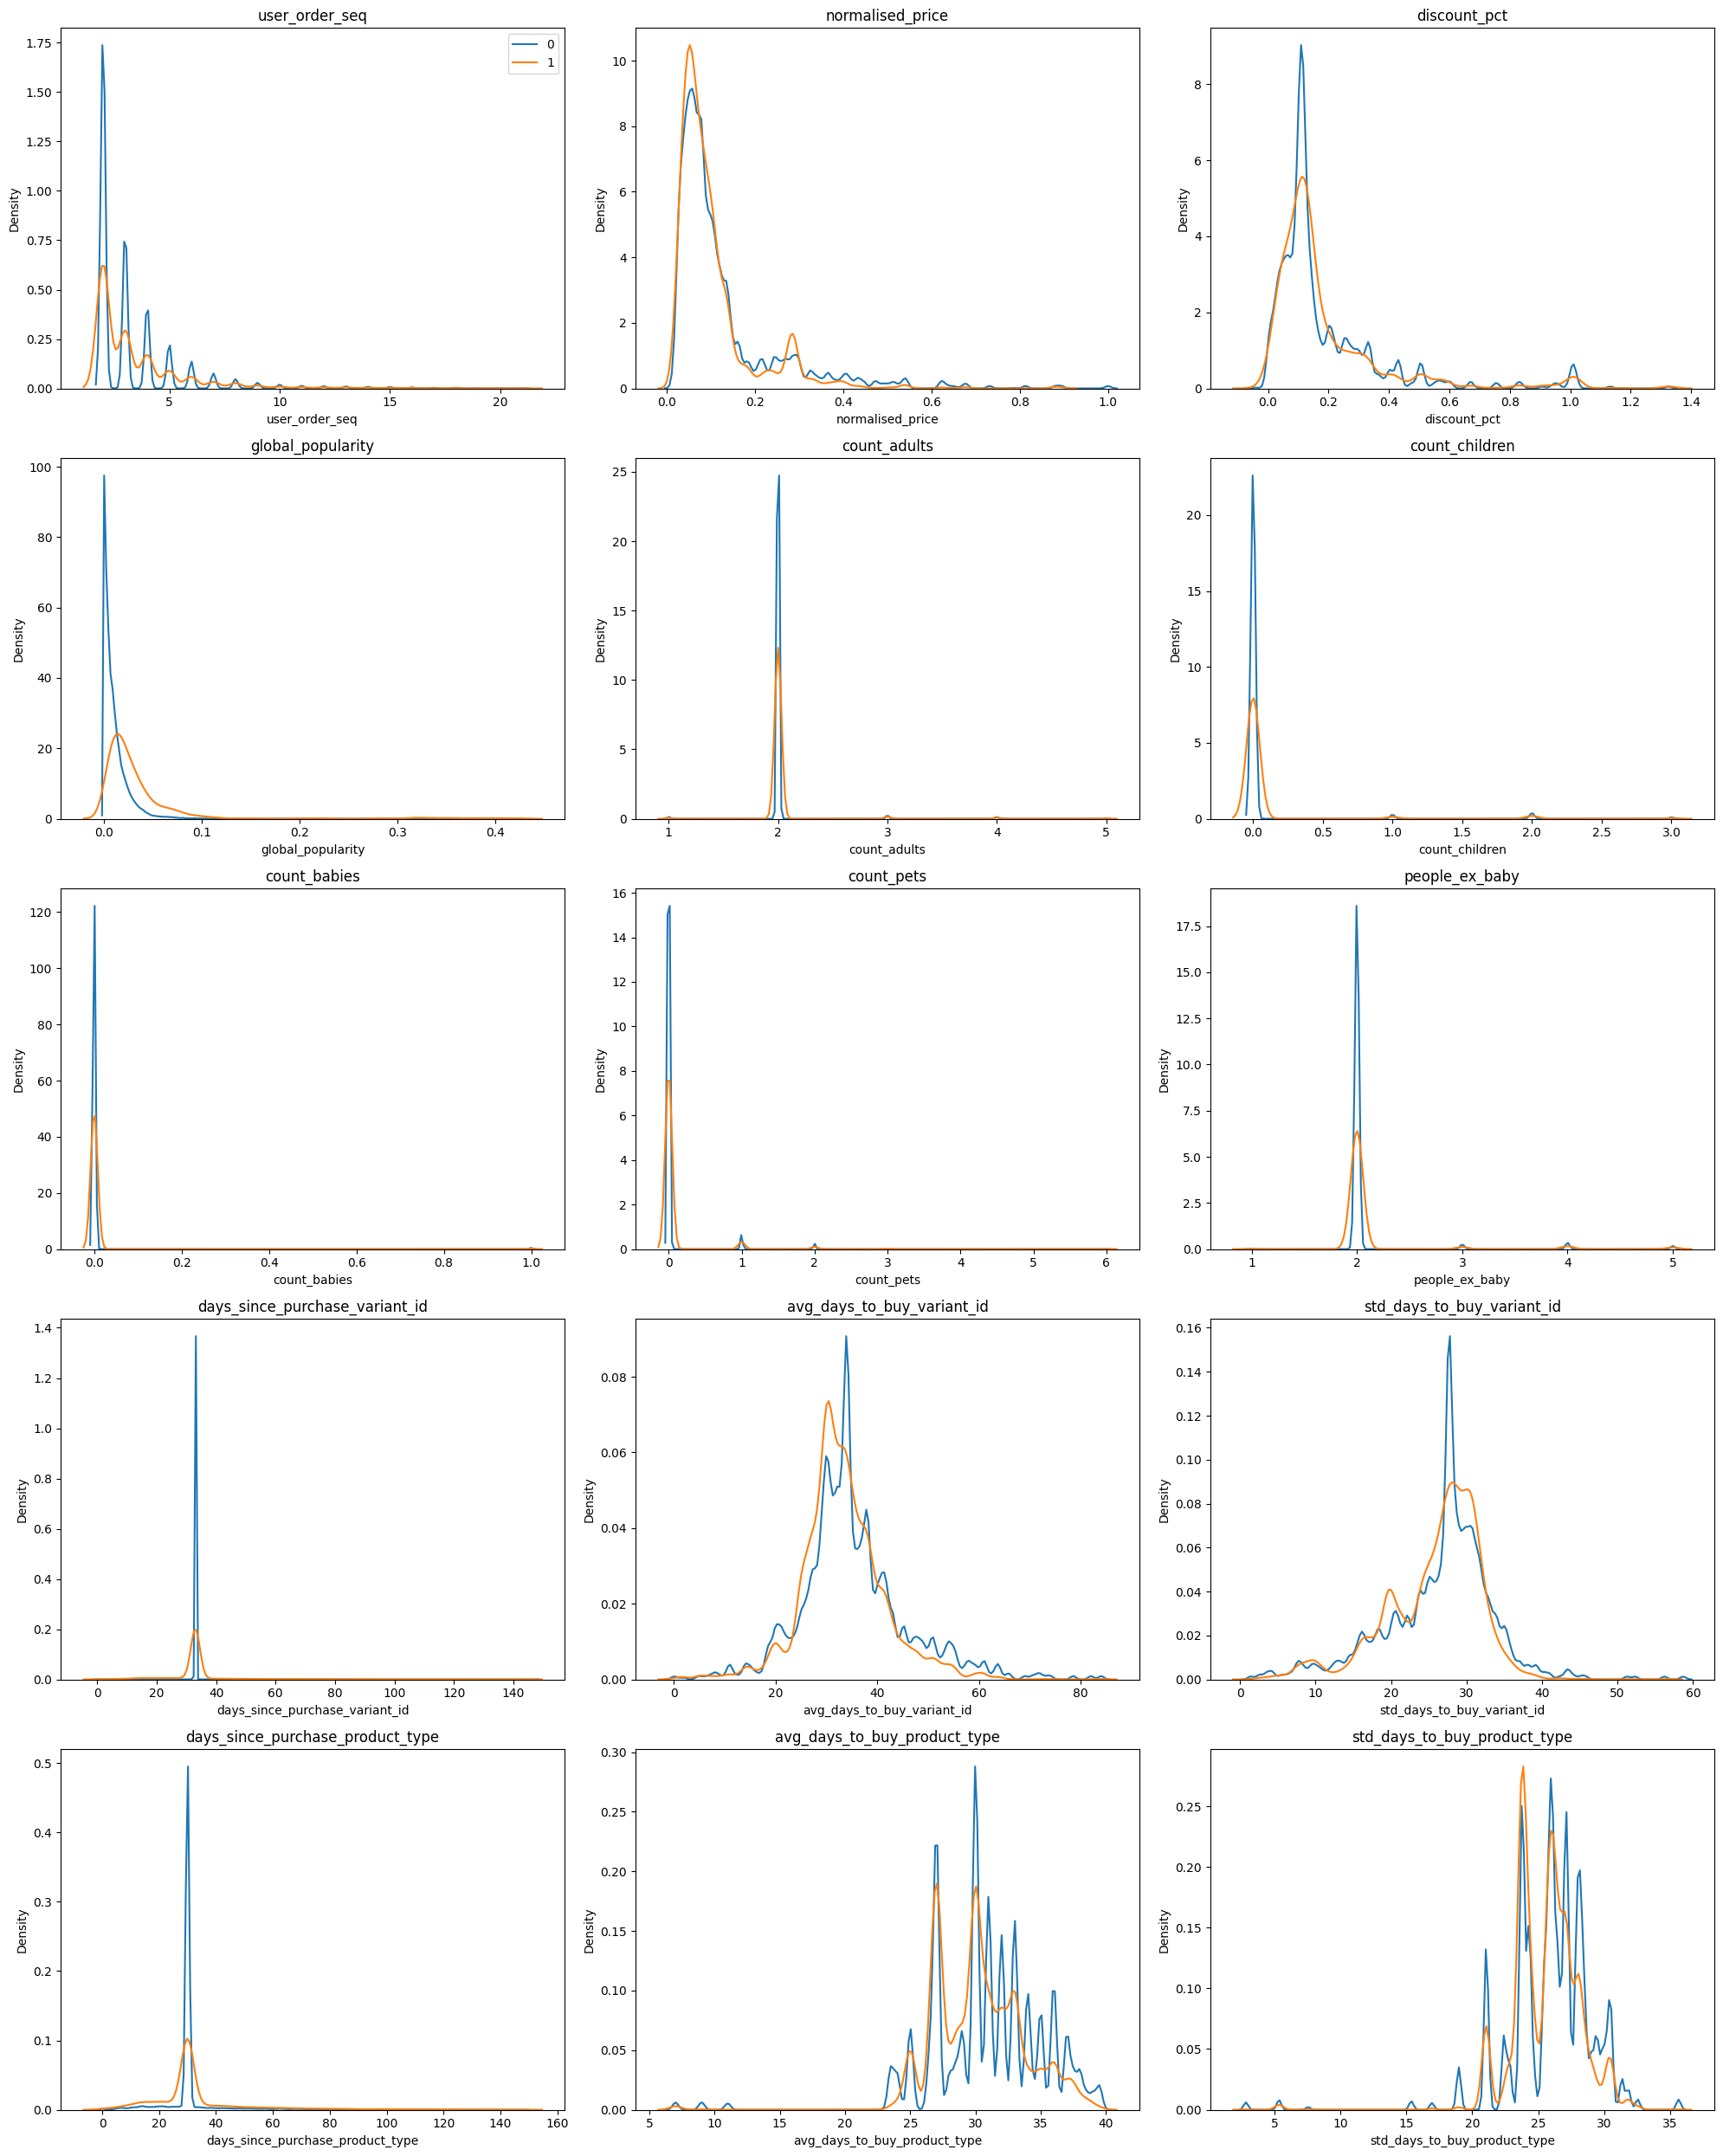

In [24]:
cols=3
rows= int(np.ceil(len(numerical_cols)/cols))
fig, ax = plt.subplots(rows, cols, figsize=(20,5 * rows))
ax=ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(df_feature.loc[lambda x: x.outcome == 0, col], label='0', ax=ax[i])
    sns.kdeplot(df_feature.loc[lambda x: x.outcome == 1, col], label='1', ax=ax[i])
    ax[i].set_title(col)

ax[0].legend()
plt.tight_layout()


In [14]:
print(df_feature['outcome'].unique())
print(df_feature['product_type'].unique())
print(df_feature['vendor'].unique())

[0 1]
['ricepastapulses' 'snacksconfectionery' 'dishwasherdetergent'
 'cleaningaccessories' 'fabricconditionerfreshener' 'coffee'
 'femininecare' 'bathroomlimescalecleaner' 'handsoapsanitisers'
 'tinspackagedfoods' 'toiletroll' 'kitchenrolltissues' 'binbags'
 'windowglasscleaner' 'homebaking' 'tea' 'jamhoneyspreads'
 'washingliquidgel' 'longlifemilksubstitutes' 'allpurposecleaner'
 'softdrinksmixers' 'condimentsdressings' 'babyfood6months' 'kidssnacks'
 'cookingingredientsoils' 'floorcleanerpolish' 'cereal'
 'driedfruitsnutsseeds' 'pickledfoodolives' 'catfood'
 'cookingsaucesmarinades' 'juicesquash' 'beer' 'kidsdental' 'nappies'
 'maternity' 'washingpowder' 'dental' 'haircare' 'bathshowergel'
 'kitchenovencleaner' 'wipescottonwool' 'dogfood' 'babytoiletries'
 'foodstorage' 'shavinggrooming' 'petcare' 'deodorant' 'washingcapsules'
 'bodyskincare' 'delicatesstainremover' 'babyfood12months'
 'facialskincare' 'superfoodssupplements' 'dryingironing'
 'premixedcocktails' 'householdsundries' 